# Import Required Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y = make_moons(100,noise = 0.25,random_state=2)

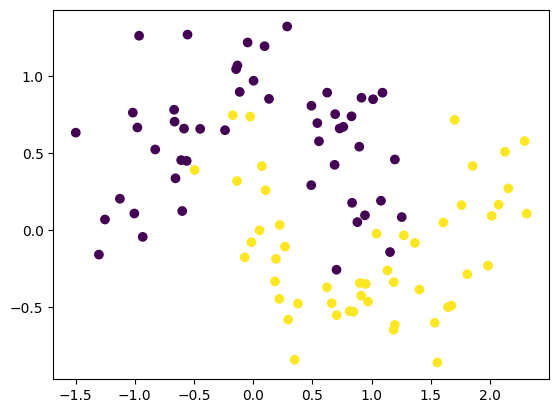

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

# Build Neural Network without Regulerization

In [4]:
model1 = Sequential()
model1.add(Dense(128,input_dim = 2,activation = 'relu'))
model1.add(Dense(128,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [5]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss ='binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [7]:
history1 = model1.fit(X,y,epochs = 2000,validation_split = 0.2,verbose =0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


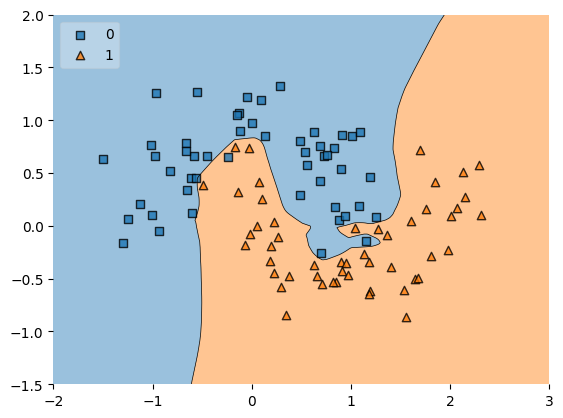

In [8]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

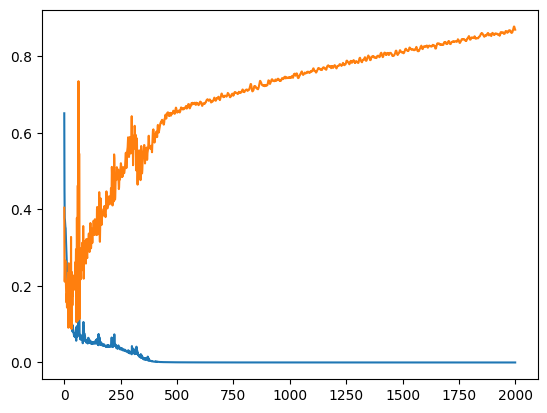

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# Build Neural Network with L1 Regulerization

In [10]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation = 'relu',kernel_regularizer= tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation = 'relu',kernel_regularizer= tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation = 'sigmoid'))

In [11]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


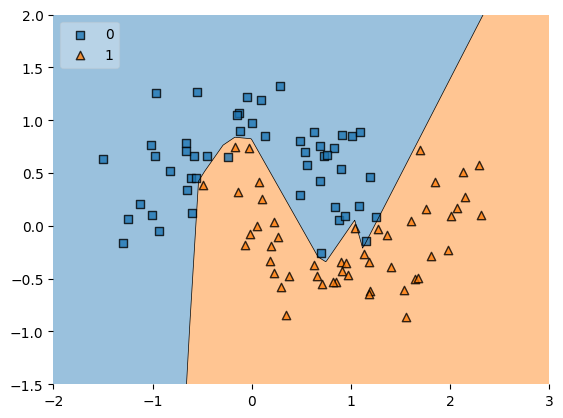

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

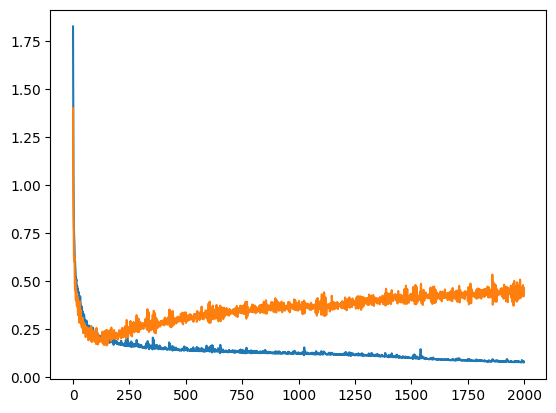

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [15]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

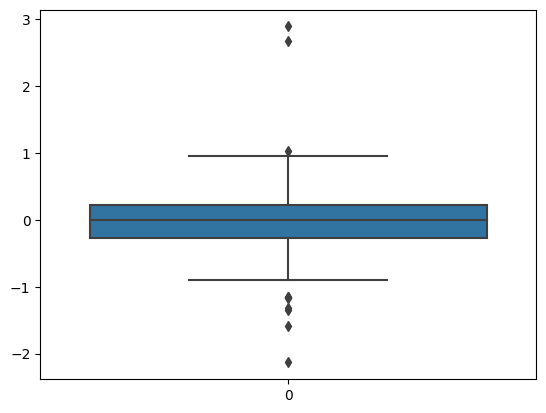

In [16]:
sns.boxplot(model1_weight_layer1)

<Axes: >

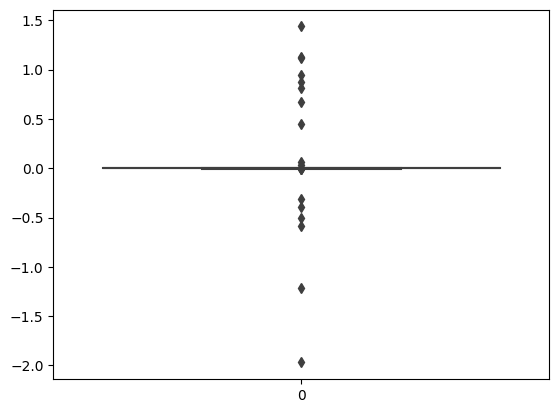

In [17]:
sns.boxplot(model2_weight_layer1)

In [18]:
model1_weight_layer1.min()

-2.1325598

In [19]:
model2_weight_layer1.min()

-1.969533

<Axes: ylabel='Density'>

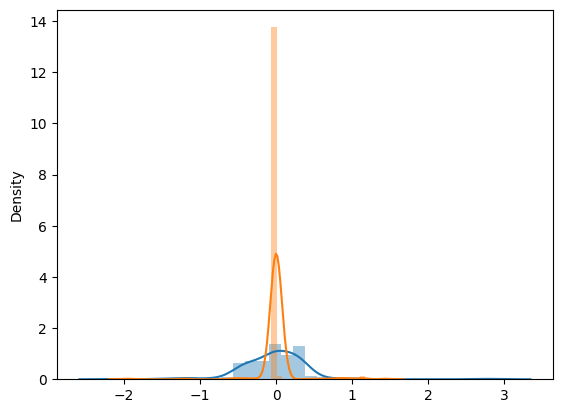

In [20]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [21]:
model1.get_weights()[0].reshape(256)

array([-2.87354272e-02, -3.31542045e-01, -2.85005182e-01, -4.03999865e-01,
       -2.33772807e-02,  5.74775413e-02,  1.10084161e-01, -4.32547510e-01,
       -1.85058832e-01, -5.39743483e-01,  1.77430317e-01,  1.29274977e-02,
        2.83755541e-01, -2.16611743e-01,  3.43162924e-01,  1.57704830e-01,
       -2.35392712e-02, -1.09457001e-01,  3.16323906e-01,  3.56446803e-01,
        3.11458051e-01,  1.05508156e-01, -1.03229862e-02,  3.63073707e-01,
       -6.29622400e-01, -1.33107990e-01,  4.25799936e-02,  7.18486458e-02,
       -3.56015265e-01,  3.40348214e-01,  1.35552332e-01, -1.77233338e-01,
        2.06399277e-01, -8.50702524e-02, -7.41943046e-02,  9.90686193e-02,
        1.35642737e-01, -3.41121256e-01, -7.54275918e-02, -1.50216371e-01,
       -4.97585982e-01, -1.14163518e-01, -4.87406969e-01,  7.70104583e-03,
       -2.39667878e-01,  1.54647395e-01,  3.08676004e-01, -5.30739427e-02,
        2.66843811e-02, -3.99524242e-01, -7.48598725e-02,  1.29761264e-01,
       -5.18487632e-01, -

# Important Keys :
- when model is overfitted , then we can apply regulerization.
- regulerization is technique to adding penalty term to reduce weight in ANN we reduce weight and bias by minimizing loss functio.
- Biggest reason of overfitting neural network is **Complexity of Data**.
- rather than capturring essense of data,it's try to capture all small small pattern.

# Process to Solve it:
- if you have complex neural network
- drop some node (means set weight value of this node close to 0)
- model will converted complex to simple
- then he will not able to make more lines
- mostly L2 regulerization used in industry 
- in L1 reguleriztion weight can become zero but in L2 it's close to 0.
